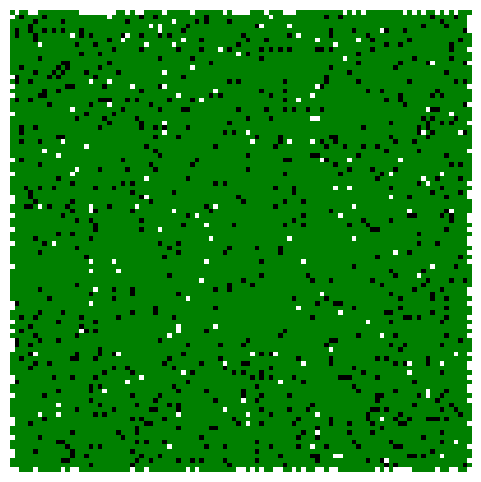

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

cores = ListedColormap(['white', 'green', 'red', 'black'])

N = 100
floresta = np.random.choice([0, 1], (N, N), p=[0.3, 0.7])
floresta[50, 50] = 2

fig, ax = plt.subplots(figsize=(6, 6))
imagem = ax.imshow(floresta, cmap=cores, vmin=0, vmax=3)
plt.axis('off')

def atualizar(frame):
    global floresta
    nova_floresta = floresta.copy()

    for i in range(1, N-1):
        for j in range(1, N-1):
            if floresta[i, j] == 1:
                if 2 in [floresta[i-1, j], floresta[i+1, j], floresta[i, j-1], floresta[i, j+1]]:
                    nova_floresta[i, j] = 2
            elif floresta[i, j] == 2:
                nova_floresta[i, j] = 3
            elif floresta[i, j] in [0, 3]:
                if np.random.random() < 0.01:
                    nova_floresta[i, j] = 1

    floresta = nova_floresta.copy()
    imagem.set_data(floresta)
    return [imagem]

ani = FuncAnimation(fig, atualizar, frames=300, interval=50)
ani.save('floresta_incendio.gif', writer='pillow')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simular_incendio(N, p_arvore):
    floresta = np.random.choice([0, 1], (N, N), p=[1-p_arvore, p_arvore])

    floresta[:, 0] = 2

    while 2 in floresta:
        nova_floresta = floresta.copy()
        fogo_i, fogo_j = np.where(floresta == 2)

        for k in range(len(fogo_i)):
            i, j = fogo_i[k], fogo_j[k]
            vizinhos = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            for vi, vj in vizinhos:
                if 0 <= vi < N and 0 <= vj < N:
                    if floresta[vi, vj] == 1:
                        nova_floresta[vi, vj] = 2

            nova_floresta[i, j] = 3

        floresta = nova_floresta

    total_queimado = np.sum(floresta == 3) + np.sum(floresta == 2)
    return total_queimado / (N * N)

N = 50
densidades = np.linspace(0, 1, 20)
resultados = []

print("Rodando simulação de Monte Carlo...")

for p in densidades:
    media_queimada = 0
    repeticoes = 10
    for _ in range(repeticoes):
        media_queimada += simular_incendio(N, p)
    resultados.append(media_queimada / repeticoes)

plt.figure(figsize=(8, 5))
plt.plot(densidades, resultados, 'o-', color='firebrick', linewidth=2)
plt.axvline(x=0.59, color='gray', linestyle='--', label='Limiar Teórico (0.59)')
plt.title('Transição de Fase: Densidade vs Área Queimada')
plt.xlabel('Densidade da Floresta (p)')
plt.ylabel('Fração da Floresta Queimada')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('grafico_fase.png')
print("Gráfico gerado: grafico_fase.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

N = 100
cmap = ListedColormap(['white', 'forestgreen', 'orangered', 'black'])

def salvar_frame(matriz, nome_arquivo, titulo):
    plt.figure(figsize=(6, 6))
    plt.imshow(matriz, cmap=cmap, vmin=0, vmax=3)
    plt.title(titulo)
    plt.axis('off')
    plt.savefig(nome_arquivo, bbox_inches='tight', dpi=150)
    plt.close()
    print(f"Salvo: {nome_arquivo}")


floresta = np.random.choice([0, 1], (N, N), p=[0.4, 0.6])
floresta[50, 50] = 2
salvar_frame(floresta, 'figura1.png', 't=0 (Início)')

for _ in range(30):
    nova_floresta = floresta.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            if floresta[i, j] == 1:
                if 2 in [floresta[i-1, j], floresta[i+1, j], floresta[i, j-1], floresta[i, j+1]]:
                    nova_floresta[i, j] = 2
            elif floresta[i, j] == 2:
                nova_floresta[i, j] = 3
    floresta = nova_floresta
salvar_frame(floresta, 'figura2.png', 't=30 (Propagação)')

for _ in range(50):
    nova_floresta = floresta.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            if floresta[i, j] == 1:
                 if 2 in [floresta[i-1, j], floresta[i+1, j], floresta[i, j-1], floresta[i, j+1]]:
                    nova_floresta[i, j] = 2
            elif floresta[i, j] == 2:
                nova_floresta[i, j] = 3
            elif floresta[i, j] == 3:
                if np.random.random() < 0.05:
                    nova_floresta[i, j] = 1
    floresta = nova_floresta
salvar_frame(floresta, 'figura3.png', 't=80 (Regeneração)')